In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import beta
from scipy.stats import norm
from scipy.stats import weibull_min
import scipy
from scipy.stats import weibull_min
from scipy import stats


# Part 3



In [ ]:
#2.1 Create urn
np_values=np.asarray ([1,2,3])
np_counts=np.asarray ([3,2,1])
np_urn=np.repeat(np_values , np_counts)
#print(np_urn)
 #Draw with replacement
N=6
np_draw_with_replacement=np.random.choice(np_urn , size=N, p=None , replace=True)
print("Draw with replacement",np_draw_with_replacement)


NameError: ignored

In [ ]:
#2.2 FROM UNIVARIATE NORMAL USING NUMPY
mu=0
sigma=1
N=10
np_onedimensional_normal_data=np.random.normal(mu , sigma , N)
print(np_onedimensional_normal_data)

[-0.17309686 -0.39386744 -0.44669218 -0.8369959   0.62803448  0.52577777
  1.68035269  0.19823043 -1.39136915 -0.19159784]


In [ ]:
#RESAMPLING FROM MULTIVARIATE NORMAL USING NUMPY
list_mu=[1, 2]
list_SIGMA= [[1, 0], [0, 1]]
N=10
np_2dimensional_normal_samples_as_rows= np.random.multivariate_normal(list_mu ,list_SIGMA ,N)
print("Data:",np_2dimensional_normal_samples_as_rows)
print("Datatype of np_2dimensional_normal_data_as_rows:",type(np_2dimensional_normal_samples_as_rows) )
print("Shape of np_2dimensional_normal_data_as_rows:",np_2dimensional_normal_samples_as_rows.shape)

Data: [[-0.04090881  1.1592895 ]
 [ 1.53121571  1.07674655]
 [ 1.28160194  1.81016257]
 [-1.19627925  2.07299087]
 [ 2.14400011 -0.66004461]
 [ 2.03029767  1.07723398]
 [ 1.75660707  1.74458582]
 [ 1.64460655  0.29487675]
 [-0.35091979  1.60631228]
 [ 1.05209074  0.42987322]]
Datatype of np_2dimensional_normal_data_as_rows: <class 'numpy.ndarray'>
Shape of np_2dimensional_normal_data_as_rows: (10, 2)


# Part 3

In [ ]:
#3.1, A1 Urn model of discrete probability distribution
#Create urn
np_values=np.asarray ([1,2,3])
np_counts=np.asarray ([2,3,195])
np_urn=np.repeat(np_values , np_counts)
#print(np_urn)
#Draw with repalcement N times
N=100
np_draw_with_replacement=np.random.choice(np_urn , size=N, p=None , replace=True)
print("Draw with replacement",np_draw_with_replacement)

Draw with replacement [3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


In [ ]:
#3.2, A2 Urn model for lab instrument processing times
#Create urn
np_values=np.asarray ([54,66,70,72,97])
np_counts=np.asarray ([1,1,1,1,1])
np_urn=np.repeat(np_values , np_counts)
#print(np_urn)
#Draw with repalcement N times
N=3
np_draw_with_replacement=np.random.choice(np_urn , size=N, p=None , replace=True)
#print("Draw with replacement",np_draw_with_replacement)
# total time

def calcTime(Arr):
  totTime=0
  for i in range(0, len(Arr)):
    totTime = totTime + Arr[i]
  return totTime
#print(calcTime(np_draw_with_replacement))

def runAndCheck(M):
  goodRuns=0
  over200=0
  N=3
  for i in range(0, M):
    Arr= np.random.choice(np_urn , size=N, p=None , replace=True)
    totTime= calcTime(np.random.choice(np_urn , size=N, p=None , replace=True))
    #print (Arr)
    #print (totTime)
    if totTime<= 200:
      goodRuns+=1
    else:
      over200+=1
  probLonger200= over200/M
  return (goodRuns, over200,probLonger200 )

print(runAndCheck(1000))




(305, 695, 0.695)


In [ ]:
#3.3, A3 Urn model for fault analysis
#Create urn
np_values=np.asarray (['red', 'white'])
np_counts=np.asarray ([400,800])          #Ändra antal för b)
np_urn=np.repeat(np_values , np_counts)

def drawBalls (M):
  N=3
  amountGood=0

  for i in range (0,M):
    ballCollor= np.random.choice(np_urn , size=N, p=None , replace=True) #replace är switch mellan att replacea eller inte i c
    amountGood = amountGood + fault(ballCollor)
    #print (ballCollor)
    #print (amountGood)

  #print (amountGood)
  andelGood = amountGood/M
  return andelGood

def fault(Arr):
  for i in range (0,len(Arr)):
    if Arr[i]=='red':
      return 0
  return 1

print (drawBalls(1000))

# a ger ca 0,24
# b ger ca 0,29
# c ger ca 0,29 för små urval och för stora urval
# d eftersom vi plockar bort och litet urval minstar sannorlikhet för alla rätt i a
#   i b ger bprtplocket liten skillnad i urvalen och därmed behålls ca 1/3 förhållandet.
#   I c eftersom vi lägger tillbaka förändras inte urvalet och därmed är b och c lika och närmare 1/3

0.296


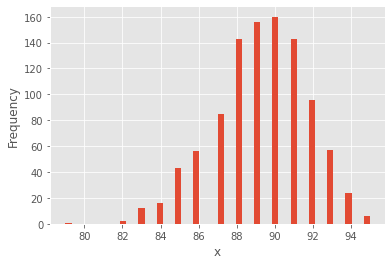

In [ ]:
#3.4 Urn model of a pipetting robot with success rate 93%
np_values=np.asarray (['Correct', 'Fail'])
np_counts=np.asarray ([93,7])
np_urn=np.repeat(np_values , np_counts)

def pipette(Tries):
  N=96
  successfullPipette=0
  correctPerSet=[]
  for i in range (0,Tries):
    oneSet= np.random.choice(np_urn , size=N, p=None , replace=True)
    correctPerSet=np.append(correctPerSet,count(oneSet))
  return correctPerSet


def count(Arr):
  count=0
  for i in range (0,len(Arr)):
    if Arr[i]=='Correct':
      count = count +1
  #print(count)
  return count

x=pipette(1000)
#print (x)
#np.histogram(dataSet)

import matplotlib.pyplot as plt
plt.style.use('ggplot') #styel of graph


hist, bin_edges = np.histogram(x, bins=50)

fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

#fig, ax = plt.subplots()
#ax.hist(x, bin_edges, cumulative=True)
#ax.set_xlabel('x')
#ax.set_ylabel('Frequency')
#plt.show()

# Part 4
#### beta distribution is in the intervall of [0,1]

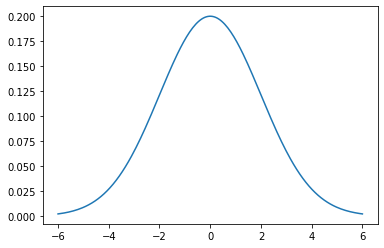

In [ ]:
# 4.1
#a)
#Normal
mu= 0
sigma =2
x = np.linspace(-6,6,200)

plt.plot(x, norm.pdf(x,mu,sigma))

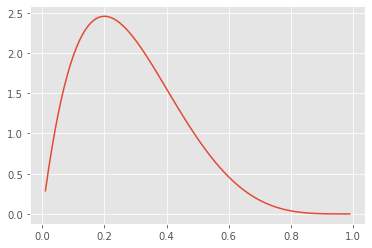

In [ ]:
#Beta plot
alpha=2
betaa= 5
x2 = np.arange (0.01, 1, 0.01)
y = beta.pdf(x2,alpha,betaa)
plt.plot(x2,y)

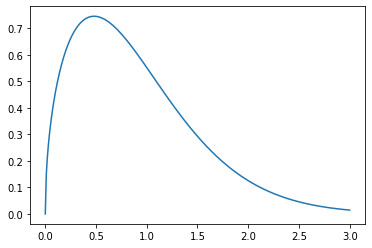

In [ ]:
#Weigbull
lamba= 1
k=1.5
def weib(x,n,a):
  return (a / n) * (x / n)**(a - 1) * np.exp(-(x / n)**a)

x3= np.linspace(0,3,300)
#plt.plot(x3, weibull( lamba, k))
#plt.show()

plt.plot(x3, weib(x3, lamba, k))
plt.show()

In [ ]:
#4.1 b)
#Draw a sample x from a Weibull(lambda,k) distribution 2

def drawTest(M):
  allTests=np.array([])
  for i in range(0,M):
    oneTest=lamba*np.random.weibull(k)
    allTests= np.append(allTests, oneTest)
  return allTests

print(drawTest(10))

[0.94386205 0.27349159 0.65863022 0.87595132 0.65410736 0.85810286
 0.43154422 1.87297165 2.04577649 1.14612825]


In [ ]:
#4.2 Data from a mixture of multiple pdfs
#Draw sample
np_values=np.asarray (['w1','w2','w3'])
np_counts=np.asarray ([5,5,90])
np_urn=np.repeat(np_values , np_counts)
#print(np_urn)
#Draw with repalcement N times
x= np.linspace(-5,5,1000)

#for graphed intervall [-3,3]
xGraph = np.linspace(-3,3,100)

mu1= -2
sigma1 =0.1
mu2= 2
sigma2 =0.1
mu3= 0
sigma3 =1


def drawOne():
  N=1
  draw= np.random.choice(np_urn , size=N, p=None , replace=True)
  #print (draw)
  return draw


def p1(intervall):
  cdf_upper_limit = norm(mu1 , sigma1).cdf(intervall[1])
  cdf_lower_limit = norm(mu1 , sigma1).cdf(intervall[0])

  prob = cdf_upper_limit - cdf_lower_limit
  plt.plot(xGraph, norm.pdf(xGraph,mu1,sigma1))
  return prob

#print(p1([-2,10]))

def p2(intervall):
  cdf_upper_limit = norm(mu2 , sigma2).cdf(intervall[1])
  cdf_lower_limit = norm(mu2 , sigma2).cdf(intervall[0])

  prob = cdf_upper_limit - cdf_lower_limit
  plt.plot(xGraph, norm.pdf(xGraph,mu2,sigma2))
  return prob

def p3(intervall):
  cdf_upper_limit = norm(mu3 , sigma3).cdf(intervall[1])
  cdf_lower_limit = norm(mu3 , sigma3).cdf(intervall[0])

  prob = cdf_upper_limit - cdf_lower_limit
  plt.plot(xGraph, norm.pdf(xGraph,mu3,sigma3))
  return prob


def checkDrawRun(val, intervall):
  if val =='w1':
    # för a)
    #return p1(intervall)

    return(np.random.normal(mu1, sigma1))
  if val == 'w2':
    # för a)
    #return p2(intervall)

    return(np.random.normal(mu2, sigma2))
  if val == 'w3':
    # för a)
    #return p3(intervall)

    return(np.random.normal(mu3, sigma3))



#print(checkDrawRun(drawOne(), [-3,3]))
def uppgiftB(M):
  #1000 random punkter från random normalfördelning
  allRandom= []
  for i in range (0,M):
    allRandom= np.append(allRandom, checkDrawRun(drawOne(), [-3,3]))  #intervall används ej

  #plt.plot(xGraph, norm.pdf(xGraph,mu1,sigma1))
  #plt.plot(xGraph, norm.pdf(xGraph,mu2,sigma2))
  #plt.plot(xGraph, norm.pdf(xGraph,mu3,sigma3))
  #plt.hist(allRandom, bins=100) #to plot all points
  #plt.show()
  return allRandom
plt.hist(uppgiftB(1000), bins=100) #to plot all points


In [ ]:
#4.3 a) Data from a Gaussian kernel density estimator
# a)
dataSet= uppgiftB(200)

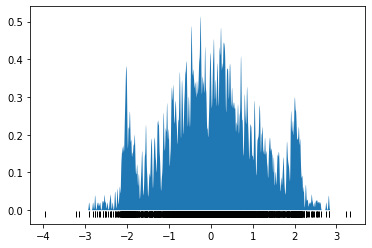

In [ ]:
# B) Skapa KDE
from sklearn.neighbors import KernelDensity
dataSet= uppgiftB(2000)
x= np.linspace(-3,3, len(dataSet))

# KDE

kde = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(dataSet[:, None])

logprob= kde.score_samples(x[:, None])

plt.fill_between(x,np.exp(logprob))
plt.plot(dataSet,np.full_like(dataSet, -0.01), '|k', markeredgewidth = 1)





(array([ 2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  2.,  0.,  0.,  2.,
         1.,  3.,  4.,  6., 12., 22., 18., 20.,  8.,  2.,  1.,  8.,  5.,
         9.,  5.,  5.,  6.,  7., 11.,  5.,  8.,  8.,  6., 15., 16.,  9.,
        21., 14., 21., 18.,  8., 24., 20., 35., 28., 13., 30., 30., 20.,
        20., 34., 27.,  9., 19., 22., 21., 17., 10., 15., 19., 11., 12.,
        12., 12., 20., 12., 10., 15.,  8.,  4., 11., 10.,  8., 24.,  8.,
         3.,  6.,  5., 12., 17., 14., 13.,  8.,  5.,  2.,  0.,  2.,  2.,
         3.,  6.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-3.22435386, -3.16159457, -3.09883527, -3.03607598, -2.97331669,
        -2.9105574 , -2.84779811, -2.78503882, -2.72227953, -2.65952024,
        -2.59676095, -2.53400166, -2.47124237, -2.40848308, -2.34572378,
        -2.28296449, -2.2202052 , -2.15744591, -2.09468662, -2.03192733,
        -1.96916804, -1.90640875, -1.84364946, -1.78089017, -1.71813088,
        -1.65537159, -1.59261229, -1.529853  , -1.46709371, -1.404334

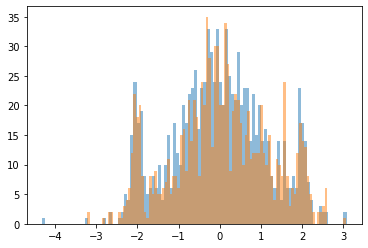

In [ ]:
# c)
data=uppgiftB(1000)


def my_kde_datagen(D,M_desired,b):
  #data = np.atleast_2d(data).T
  kde = KernelDensity(kernel='gaussian', bandwidth=b).fit(D[:, None])
  return kde.sample(M_desired, 1)

# d)
y= my_kde_datagen(data,1000,0.01)
#print ('detta är y', y)

# e)
plt.hist(data, bins=100, alpha=0.5)
plt.hist (y, bins=100, alpha =0.5)

<ipython-input-5-66b2d9691778>:18: RuntimeWarning: covariance is not positive-semidefinite.
  sample3= np.random.multivariate_normal(mu, covarianceVectorC, 1000)


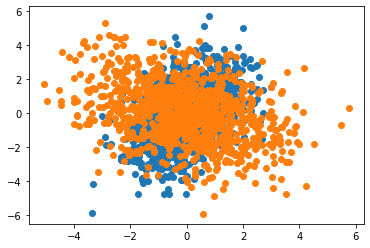

In [ ]:
#4.4 a)
covarianceVector=np.array([[1, 0.7], [0.7, 3]])
mu=np.array([0,0])

sample1= np.random.multivariate_normal(mu, covarianceVector, 1000)
#print(sample)
x1,y1 = sample1[:,0], sample1 [:,1]
plt.scatter(x1,y1)

# b)
covarianceVectorB=np.array([[1, -0.7], [-0.7, 3]])
sample2= np.random.multivariate_normal(mu, covarianceVectorB, 1000)
x2,y2 = sample2[:,0], sample2 [:,1]
#plt.scatter(x2,y2)

# c)
covarianceVectorC=np.array([[1, -3], [-3, 1]])
sample3= np.random.multivariate_normal(mu, covarianceVectorC, 1000)
x3,y3 = sample3[:,0], sample3 [:,1]
plt.scatter(x3,y3)



# Part 5 - Markov and Hidden Markov Models: Discrete time and discrete states


(array([549., 126., 325.]),
 array([0.        , 0.66666667, 1.33333333, 2.        ]),
 <BarContainer object of 3 artists>)

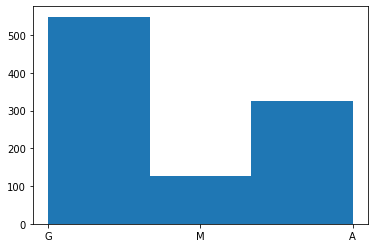

In [ ]:
# 5
#5.1b)
initialState = 'G'

def nextState(state):
  r= np.random.rand()
  if state == 'G':
    if r <= 0.2:
      return 'M'
    else:
      return 'G'
  elif state== 'M':
    if r <= 0.2:
      return 'A'
    else:
      return 'G'
  else:
    if r <= 0.1:
      return 'G'
    else:
      return 'A'

def runMarkov(initial, reps):
  nextRun= initial
  wholeArray= np.array([initial])
  for i in range(0,reps-1):
    nextRun= nextState(nextRun)
    wholeArray = np.append(wholeArray, nextRun)
  return wholeArray

svar=runMarkov(initialState, 1000)
plt.hist(svar, bins=3)


In [ ]:
# 5.2 Generate state sequence from a 5-state Markov model

initialState = 'S0'

def nextState(state):
  r= np.random.rand()

  if state == 'S1':
    if r <= 0.1:
      return 'S2'
    else:
      return 'S1'

  elif state== 'S2':
    return 'S3'

  elif state== 'S0':
    return 'S1'

  elif state== 'S3':
    if r <= 0.1:
      return 'S4'
    else:
      return 'S3'



def runMarkov(initial):
  nextRun= initial
  wholeArray= np.array([initial])

  while nextRun != 'S4':
    nextRun= nextState(nextRun)
    wholeArray = np.append(wholeArray, nextRun)
  return wholeArray

def runFunction(start, M):
  for i in range (0,M):
    print(runMarkov(start))

runFunction(initialState, 10)

In [ ]:
# 5.3 Generate symbol sequences from a Hidden Markov Model

initialState = 'S0'
np_values=np.asarray (['A','C','G','T'])

def forS1 ():
  np_counts=np.asarray ([25,25,25,25])
  np_urn=np.repeat(np_values , np_counts)
  np_draw_with_replacement=np.random.choice(np_urn , size=1, p=None , replace=True)
  return np_draw_with_replacement

def forS2 ():
  np_counts=np.asarray ([5,0,95,0])
  np_urn=np.repeat(np_values , np_counts)
  np_draw_with_replacement=np.random.choice(np_urn , size=1, p=None , replace=True)
  return np_draw_with_replacement

def forS3 ():
  np_counts=np.asarray ([40,10,10,40])
  np_urn=np.repeat(np_values , np_counts)
  np_draw_with_replacement=np.random.choice(np_urn , size=1, p=None , replace=True)
  return np_draw_with_replacement

def nextState(state):
  r= np.random.rand()

  if state == 'S1':
    if r <= 0.1:
      return ['S2', forS1()]
    else:
      return ['S1', forS1()]

  elif state== 'S2':
    return ['S3', forS2()]

  elif state== 'S0':
    return ['S1', forS2()]

  elif state== 'S3':
    if r <= 0.1:
      return ['S4', forS3()]
    else:
      return ['S3', forS3()]

def runMarkov(initial):
  nextRun= np.array([initial, None])
  wholeArray= np.array([])

  while nextRun[0] != 'S4':
    nextRun= nextState(nextRun[0])
    wholeArray = np.append(wholeArray, nextRun[1])
  return wholeArray

def runFunction(start, M):
  for i in range (0,M):
    print(runMarkov(start))

runFunction(initialState, 1)


#print(runMarkov(initialState))


['G' 'C' 'T' 'C' 'G' 'G' 'G' 'T']


# Part 6 - Linear relationships embedded in measurement noise

In [ ]:
# 6.1 a)
x= np.random.uniform(0,1,10)
y= 2*x+4
print (x,y)

# b)
mu=0
sigma= 0.3
x2= np.array([None]*len(x))
y2= np.array([None]*len(y))

for i in range (0,len(x)):
  x2[i] = x[i] + np.random.normal(mu, sigma)
  y2[i] = y[i] + np.random.normal(mu, sigma)
print(x2,y2)


[0.16870273 0.59411446 0.43037045 0.03050114 0.74328572 0.61050985
 0.95395226 0.26182291 0.20009461 0.68860039] [4.33740545 5.18822892 4.86074089 4.06100228 5.48657144 5.2210197
 5.90790452 4.52364581 4.40018923 5.37720077]
[-0.22327382645798016 0.5306868508410789 -0.10626715066588022
 -0.273555811544943 0.8731700495927697 0.24643006887195262
 1.0802047050996222 0.08620080162231966 0.5370359265403488
 1.1663219528789357] [4.152602017760325 5.300268300576017 5.0645560974237185 4.154960029412324
 5.646028050172521 5.00383785067849 6.3877324406309945 4.523738677878248
 4.228201635063062 5.642781906240226]


In [ ]:
# 6.2 a)
covarianceMatrix= 0.25* np.identity(3)
x3a= np.random.multivariate_normal([0,0,0], covarianceMatrix, 1000)
y3a= np.array([])

for i in range(0, len(x3a)):
  addRow= [0.3, 0.2, 0.5]* x3a[i]
  y3a = np.append(y3a, sum(addRow))
#print(x3a)
print(y3a)

x3b= np.array([None]*(len(x3a)))
y3b= np.array([None]*len(y3a))

#b)
mu=0
sigma= 0.3
for i in range (0, len(x3a)):
  x3b[i] = x3a[i] + np.random.multivariate_normal([0,0,0], covarianceMatrix, 1)
  y3b[i] = y3a[i] + np.random.normal(mu, sigma)

#print (x3b)
#print (y3b)


# MU and sigma
yMu = np.mean(y3a)
ySigma = np.std(y3a)
thisShouldBeBg = yMu/ySigma
print(yMu, ySigma)
print('thisShould be big', thisShouldBeBg)